#**Deep Learning**

## Programming Assignment-1

*By Sanya Goel (220321) CSE-2*

## **Problem Definition :**

The project will try to compare 2 neural network approaches (MLP AND CNN) for classifying 4 types of flowers (crocus,pansy,daisy,sunflower) using a dataset of 234 RGB images. The performance of both models will be evaluated based on accuracy, computational efficiency, and feature representation effectiveness.

## **Expected Deliverables**

Dataset Preprocessing:

1.   Apply binary masks to images for MLP feature extraction.
2.   Using raw images directly instead of applying any binary mask for CNN training



Model Implementation:



1.   Training a MLP using the extracted numerical features
2.   Training the CNN, that can find out important feature information itself and classify.


Performance Evaluation:



1.   Compare both models in terms of accuracy, computational efficiency, and feature representation.
2.   Results with metrics like confusion matrices and accuracy scores


# Dataset Description

This dataset has two folders: images and masks.

The images folder contains 234 pictures of four different flowers: sunflowers, pansies, daisies, and crocuses.

The file names indicate which flower type each image belongs to. So first of all, we would need to extract the labels for each image through the filenames. I tried to do this through regex expressions. Using the RE package, we were able to substitute the content we wanted to remove with empty space. Leaving the rest of it as our label.

The masks folder has binary masks, where the background is removed, leaving only the flower clearly highlighted.

---------------------------------

# Extraction Of the RAR file dataset into the Dataset Folder.

In [ ]:
!apt-get install unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 129 not upgraded.


In [ ]:
!unrar x '/content/DLProgramData.rar'  '/content/Dataset/'



UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal

Cannot open /content/DLProgramData.rar
No such file or directory
No files to extract


In [ ]:
import os
import re #regex

# Extracting Labels from Image File Names

For all the files in my image folder, I removed the "image_" and the number that ended from the file name and saved it under label variable.

Then just added it in y_labels list.

Just to be safe I also sorted the image files in the images first, just to be consistent.


In [ ]:
filenames = sorted(os.listdir('/kaggle/input/dlprogramdata/dataset/images'))
y_labels = []

for filen in filenames:
  label = re.sub(r'^image_|_\d+','',os.path.splitext(filen)[0])
  y_labels.append(label)

  print(label)
  print(filen)

crocus
image_crocus_0001.png
crocus
image_crocus_0002.png
crocus
image_crocus_0003.png
crocus
image_crocus_0004.png
crocus
image_crocus_0005.png
crocus
image_crocus_0006.png
crocus
image_crocus_0007.png
crocus
image_crocus_0008.png
crocus
image_crocus_0009.png
crocus
image_crocus_0010.png
crocus
image_crocus_0011.png
crocus
image_crocus_0012.png
crocus
image_crocus_0013.png
crocus
image_crocus_0014.png
crocus
image_crocus_0015.png
crocus
image_crocus_0016.png
crocus
image_crocus_0017.png
crocus
image_crocus_0018.png
crocus
image_crocus_0019.png
crocus
image_crocus_0020.png
crocus
image_crocus_0021.png
crocus
image_crocus_0022.png
crocus
image_crocus_0023.png
crocus
image_crocus_0024.png
crocus
image_crocus_0025.png
crocus
image_crocus_0026.png
crocus
image_crocus_0027.png
crocus
image_crocus_0028.png
crocus
image_crocus_0029.png
crocus
image_crocus_0030.png
crocus
image_crocus_0031.png
crocus
image_crocus_0032.png
crocus
image_crocus_0033.png
crocus
image_crocus_0034.png
crocus
image_c

In [ ]:
y_labels

['crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'crocus',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',


## We want to convert our categorical variables to numerical. So I used label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_labels = le.fit_transform(y_labels)
print(y_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3]


In [ ]:
masknames = sorted(os.listdir('/kaggle/input/dlprogramdata/dataset/masks'))
print(masknames)

['mask_crocus_0001.png', 'mask_crocus_0002.png', 'mask_crocus_0003.png', 'mask_crocus_0004.png', 'mask_crocus_0005.png', 'mask_crocus_0006.png', 'mask_crocus_0007.png', 'mask_crocus_0008.png', 'mask_crocus_0009.png', 'mask_crocus_0010.png', 'mask_crocus_0011.png', 'mask_crocus_0012.png', 'mask_crocus_0013.png', 'mask_crocus_0014.png', 'mask_crocus_0015.png', 'mask_crocus_0016.png', 'mask_crocus_0017.png', 'mask_crocus_0018.png', 'mask_crocus_0019.png', 'mask_crocus_0020.png', 'mask_crocus_0021.png', 'mask_crocus_0022.png', 'mask_crocus_0023.png', 'mask_crocus_0024.png', 'mask_crocus_0025.png', 'mask_crocus_0026.png', 'mask_crocus_0027.png', 'mask_crocus_0028.png', 'mask_crocus_0029.png', 'mask_crocus_0030.png', 'mask_crocus_0031.png', 'mask_crocus_0032.png', 'mask_crocus_0033.png', 'mask_crocus_0034.png', 'mask_crocus_0035.png', 'mask_crocus_0036.png', 'mask_crocus_0037.png', 'mask_crocus_0038.png', 'mask_crocus_0039.png', 'mask_crocus_0040.png', 'mask_crocus_0041.png', 'mask_crocus_00

#Problems that arrised during the process of applying binary masks to our images-



1.   The size of the images were not the same. So I got errors trying to convert our images into a numpy array.
2.   Although its a binary mask, that is it only contains 0 or 255s, it had 3 channels. So I converted to grayscale.





After this, I needed to perform AND operations between the image and my binary mask, so that only that part gets highlighted that is related to the flower object, and the background is suppressed.
After this I just appended the resultant masked images to a list, and later converted to a numpy array.




In [ ]:
import cv2
import numpy as np

imagepath = '/kaggle/input/dlprogramdata/dataset/images'
maskpath = '/kaggle/input/dlprogramdata/dataset/masks'
maskedImages = []

for image,mask in zip(filenames,masknames):
  image = cv2.imread(os.path.join(imagepath,image))
  print(image.dtype)
  mask = cv2.imread(os.path.join(maskpath,mask))
  image = cv2.resize(image,(512,512))
  mask = cv2.resize(mask,(512,512))
  # print(image.shape,mask.shape)
  gray_mask = cv2.cvtColor(mask,cv2.COLOR_BGR2GRAY)
  masked_image = cv2.bitwise_and(image,image,mask=gray_mask)
  maskedImages.append(masked_image)
  # print(mask.shape)


maskedImages = np.array(maskedImages)
print(maskedImages)

uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint

# Visualising our masked Images

As you can see from the result, the flowers are clearly getting highlight, with the background completely removed.

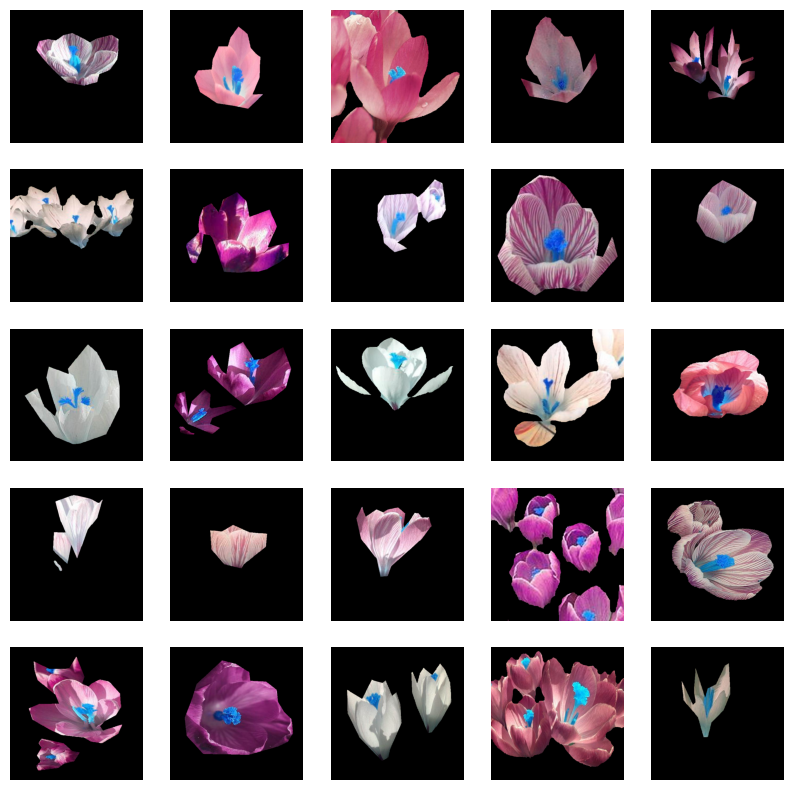

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(maskedImages[i])
  plt.axis("off")


#Computing colored histograms from the images

As mentioned in the assignment, to extract features from these images, the best way is to find out the color distribution in these images. That is count the number of pixels lying in different color ranges (bins). The higher the number of bins, the more detailed the colors will be. And we can use this information, to convert it into a feature array, and use it for further classification.
We will be able to classify with respect to the difference in colors amongst different flowers, brightness etc.

So, here we try to find out the hue distribution (which color)
The saturation distribution (intensity distribution)
And the value is the brightness.

After finding out their histograms, we just concatenate them and append them in a empty list. Later again, convert the list into a numpy array.
And now, our features are ready to be classified.

In [ ]:
#computing color histograms for these images, that is finding distribution of each color
# in this image, by counting number of pixels that fall within specific color ranges


histograms = []
for image in maskedImages:

   image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

   h_histogram = cv2.calcHist([image],[0],None,[32],[0,256])
   c_histogram = cv2.calcHist([image],[1],None,[32],[0,256])
   v_histogram = cv2.calcHist([image],[2],None,[32],[0,256])

   h_histogram = h_histogram.reshape(-1)
   c_histogram = c_histogram.reshape(-1)
   v_histogram = v_histogram.reshape(-1)

   imageVector = np.concatenate((h_histogram,c_histogram,v_histogram))

   histograms.append(imageVector)

histograms = np.array(histograms)
print(histograms)

[[219703.   1855.   2569. ...   2046.   2399.   3690.]
 [213466.   2226.   1977. ...   7164.   5757.   8333.]
 [ 92626.    417.   1652. ...   1994.   1275.   1089.]
 ...
 [210000.   6025.  16029. ...   2857.   6661.  21331.]
 [224454.  16602.  15514. ...   1391.   1528.   1545.]
 [194246.  12976.  16642. ...   4395.   4689.   4544.]]


In [ ]:
histograms.shape

(234, 96)

In [ ]:
type(y_labels)

numpy.ndarray

#Importing the necessary libraries for creating the neural network architecture.

In [ ]:
import tensorflow as tf
from tensorflow import keras



Since, later we are going to be using categorical cross entropy as our loss function, it expects our y labels to be one hot encoded. So we implement that using to_categorical.

In [ ]:
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

y_labels = to_categorical(y_labels,num_classes=4)




In [ ]:
y_labels

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],


### THIS section is if I directly just give the masked images to my MLP architecture instead of extracting color histograms.

In [ ]:
import cv2
maskedImages2 = np.array(maskedImages)
maskedImages3 = [img.flatten() for img in maskedImages2]
maskedImages3 = np.array(maskedImages3)
print(maskedImages3.shape)
# X_train,X_test,Y_train,Y_test = train_test_split(histograms,y_labels,test_size=0.2)

(234, 786432)


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(maskedImages3,y_labels,test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

You can see how its a very high dimensional data, since each image size was originally 512*512*3

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(187, 786432)
(187, 4)
(47, 786432)
(47, 4)


#Our MLP architecture.

The first layer expects an input shape to be added, so we found that our earlier by histograms.shape, and that came out to be 234,786432. Where 234 is the number of samples.
After each layer, we are using a dropout layer, because we want around 20% of neurons to be dropped everytime. So we know during testing if it does see certain unfamiliar data, it will be able to work it out. And to make it more generalised and prevent overfitting.

In the last we use softmax as the activation function, as now we want to start the classification. Softmax will return a vector of probabilities. And our number of classes is 4.

Also since its multi-class classification, our loss function is going to be categorical crossentropy.

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Dense(32,activation='relu',input_shape=(786432,)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(4,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(X_train,Y_train,validation_split=0.2,epochs=10)





/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 468ms/step - accuracy: 0.4573 - loss: 12.3233 - val_accuracy: 0.7368 - val_loss: 5.5280
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 386ms/step - accuracy: 0.6134 - loss: 26.7220 - val_accuracy: 0.8158 - val_loss: 8.2034
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 380ms/step - accuracy: 0.7906 - loss: 26.9175 - val_accuracy: 0.8421 - val_loss: 12.9094
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 384ms/step - accuracy: 0.7757 - loss: 23.8994 - val_accuracy: 0.8421 - val_loss: 9.4747
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 384ms/step - accuracy: 0.8078 - loss: 13.3718 - val_accuracy: 0.8684 - val_loss: 6.2894
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 383ms/step - accuracy: 0.8427 - loss: 6.3251 - val_accuracy: 0.8947 - val_loss: 3.4530
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 392ms/step - accuracy: 0.8616 - loss: 4.1740 - val_accuracy: 0.9211 - val_loss: 2.0358
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 391ms/step - accuracy: 0.8874 - loss: 13.4617 - val_accuracy: 0.9737 - va

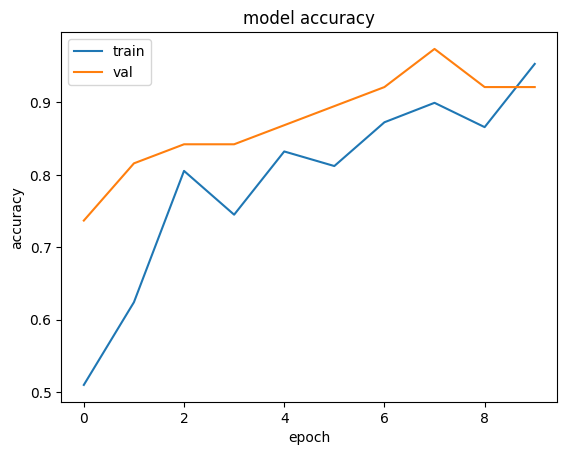

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8770 - loss: 16.6838 


Got the testing accuracy of 87%, but training accuracy of 96%, and validation accuracy of 92%

## Now we will try applying the model on our extracted color histograms features from the masked images.

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(histograms,y_labels,test_size=0.2)

You can see how smaller the dimensions are as compared to the direct masked images.

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(187, 96)
(187, 4)
(47, 96)
(47, 4)


## Normalizing our dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Our MLP architecture.

The first layer expects an input shape to be added, so we found that our earlier by histograms.shape, and that came out to be 234,96. Where 234 is the number of samples.
After each layer, we are using a dropout layer, because we want around 20% of neurons to be dropped everytime. So we know during testing if it does see certain unfamiliar data, it will be able to work it out. And to make it more generalised and prevent overfitting.

In the last we use softmax as the activation function, as now we want to start the classification. Softmax will return a vector of probabilities. And our number of classes is 4.

Also since its multi-class classification, our loss function is going to be categorical crossentropy.

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Dense(32,activation='relu',input_shape=(96,)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(4,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,Y_train,validation_split=0.2,epochs=10)





Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.2970 - loss: 1.4088 - val_accuracy: 0.4211 - val_loss: 1.3298
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4198 - loss: 1.2645 - val_accuracy: 0.5000 - val_loss: 1.2314
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4983 - loss: 1.1701 - val_accuracy: 0.5789 - val_loss: 1.1456
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6434 - loss: 1.0499 - val_accuracy: 0.6316 - val_loss: 1.0595
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5909 - loss: 1.0352 - val_accuracy: 0.6053 - val_loss: 0.9909
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6804 - loss: 0.9583 - val_accuracy: 0.6316 - val_loss: 0.9239
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7437 - loss: 0.7716 - val_accuracy: 0.6053 - val_loss: 0.8638
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7163 - loss: 0.7414 - val_accuracy: 0.6579 - val_loss: 0.8099
Epoch 9/10


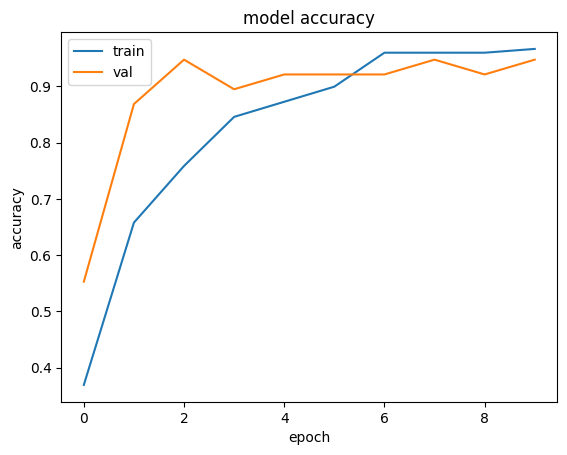

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)

#accuracy: 0.7331 - loss: 0.6727 - val_accuracy: 0.6579 - val_loss: 0.7528
#testing accuracy: 0.8382 - loss: 0.5454

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8382 - loss: 0.5454 


###Our accuracy comes out to be 83% this way. So our accuracy is not coming very good. With training accuracy itself being just 73%. So that means the feature extraction wasnt good enough for the MLP to classify them.


## Why the first model had greater accuracy than the second one? Althouhg both had the same architecture?

We know that the first model (which was given direct masked images) had access to spatial patterns and positional level data.
Even though it's a binary mask, the structure, shape, and position of features were saved.
MLP could learn complex patterns in this raw data.

However, when we are extracting the color histograms from images, and concatenating features from there, we are only getting the compressed summary of color info. Other information like structure, positions, maybe edges is lost.

But still the second method might be better because-
1) The huge dimensionality reduction-
From 786,432 → 96 features is a huge compression

2) We had Faster training as compared to the direct masked images.

So its basically a trade off of accuracy vs computational efficiency.

## Now instead of all this, I will try to directly apply CNN to my raw images.
## We will do this on raw images, as its both a feature extractor + feature classifier

In [ ]:
filenames

['image_crocus_0001.png',
 'image_crocus_0002.png',
 'image_crocus_0003.png',
 'image_crocus_0004.png',
 'image_crocus_0005.png',
 'image_crocus_0006.png',
 'image_crocus_0007.png',
 'image_crocus_0008.png',
 'image_crocus_0009.png',
 'image_crocus_0010.png',
 'image_crocus_0011.png',
 'image_crocus_0012.png',
 'image_crocus_0013.png',
 'image_crocus_0014.png',
 'image_crocus_0015.png',
 'image_crocus_0016.png',
 'image_crocus_0017.png',
 'image_crocus_0018.png',
 'image_crocus_0019.png',
 'image_crocus_0020.png',
 'image_crocus_0021.png',
 'image_crocus_0022.png',
 'image_crocus_0023.png',
 'image_crocus_0024.png',
 'image_crocus_0025.png',
 'image_crocus_0026.png',
 'image_crocus_0027.png',
 'image_crocus_0028.png',
 'image_crocus_0029.png',
 'image_crocus_0030.png',
 'image_crocus_0031.png',
 'image_crocus_0032.png',
 'image_crocus_0033.png',
 'image_crocus_0034.png',
 'image_crocus_0035.png',
 'image_crocus_0036.png',
 'image_crocus_0037.png',
 'image_crocus_0038.png',
 'image_croc

In [ ]:
import cv2
import numpy as np
imageData = []
for image in filenames:
  image = cv2.imread(f"/kaggle/input/dlprogramdata/dataset/images/{image}")
  image = cv2.resize(image,(512,512))
  imageData.append(image)

imageData = np.array(imageData)
print(imageData)

[[[[  0   5  21]
   [  0   8  24]
   [  2  14  30]
   ...
   [ 42  54  60]
   [ 40  52  58]
   [ 38  50  56]]

  [[ 13  32  46]
   [ 14  33  48]
   [ 21  38  51]
   ...
   [  9  22  28]
   [  8  20  26]
   [  8  19  25]]

  [[ 42  61  74]
   [ 44  63  76]
   [ 48  65  78]
   ...
   [  0  13  19]
   [  0  13  19]
   [  0  13  19]]

  ...

  [[  0   3   6]
   [  1   8  11]
   [ 21  28  31]
   ...
   [ 22  22  22]
   [ 14  14  14]
   [ 10  10  10]]

  [[  0   5   8]
   [  6  15  18]
   [ 32  40  43]
   ...
   [ 29  29  29]
   [ 22  22  22]
   [ 18  18  18]]

  [[  3  15  17]
   [ 13  25  27]
   [ 37  49  51]
   ...
   [ 33  33  33]
   [ 27  27  27]
   [ 23  23  23]]]


 [[[163 158 157]
   [163 158 157]
   [161 157 156]
   ...
   [160 152 137]
   [153 144 127]
   [151 141 123]]

  [[161 156 155]
   [161 156 155]
   [159 155 154]
   ...
   [158 151 135]
   [152 143 126]
   [150 140 122]]

  [[159 154 153]
   [159 154 153]
   [158 154 153]
   ...
   [157 149 134]
   [152 143 125]
   [150 140

In [ ]:
y_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(imageData,y_labels,test_size=0.2)


In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(187, 512, 512, 3)
(187,)
(47, 512, 512, 3)
(47,)


In [ ]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train,num_classes=4)
Y_test = to_categorical(Y_test,num_classes=4)


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0


#Training our CNN architecture.

The first parameter determines the number of filters in each layer. The second tuple is the kernel size (the filter size) that we are going to convolve over the image. The first layer expects the input shape. And here we need not flatten the image, as its not restricted to one dimension.

We try to reduce the size of our feature maps at every level, to avoid high computation.

After we have extracted enough features, we want to go in the fully connected layers that is our classifier.
We need to first flatten our feature map for that. After that we apply our MLP, as our classifier.
With again dropout of 40% to avoid overfitting on the training data.


In [ ]:
import tensorflow as tf
from tensorflow import keras

modelCNN4 = keras.Sequential()

modelCNN4.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(512,512,3)))
modelCNN4.add(keras.layers.MaxPool2D((2,2)))
modelCNN4.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
modelCNN4.add(keras.layers.MaxPool2D((2,2)))
modelCNN4.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
modelCNN4.add(keras.layers.Flatten())

modelCNN4.add(keras.layers.Dense(128,activation='relu'))
modelCNN4.add(keras.layers.Dropout(0.4))
modelCNN4.add(keras.layers.Dense(4,activation='softmax'))
modelCNN4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = modelCNN4.fit(X_train,Y_train,validation_split = 0.3,epochs=10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 60s 11s/step - accuracy: 0.2807 - loss: 16.0669 - val_accuracy: 0.6140 - val_loss: 3.2266
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 84s 12s/step - accuracy: 0.6329 - loss: 1.9700 - val_accuracy: 0.7719 - val_loss: 0.6390
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 54s 11s/step - accuracy: 0.7953 - loss: 0.5293 - val_accuracy: 0.8596 - val_loss: 0.3544
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 86s 11s/step - accuracy: 0.8834 - loss: 0.3296 - val_accuracy: 0.8421 - val_loss: 0.2351
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 53s 11s/step - accuracy: 0.9291 - loss: 0.2098 - val_accuracy: 0.9298 - val_loss: 0.1363
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 54s 11s/step - accuracy: 0.9448 - loss: 0.1054 - val_accuracy: 0.9123 - val_loss: 0.3428
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 54s 11s/step - accuracy: 0.9841 - loss: 0.0593 - val_accuracy: 0.9298 - val_loss: 0.1731
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 81s 11s/step - accuracy: 0.9538 - loss: 0.1131 - val_accuracy: 0.9123 - val_loss: 0.1564

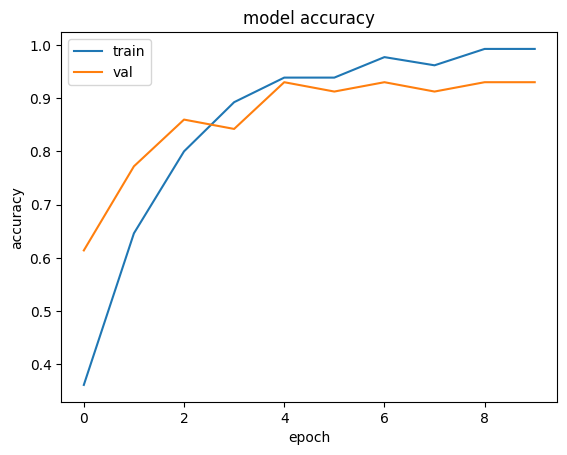

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
loss,accuracy = modelCNN4.evaluate(X_test,Y_test)

# cnn - accuracy: 0.9944 - loss: 0.0483 - val_accuracy: 0.9298 - val_loss: 0.275
# testing accuracy: 0.9612 - loss: 0.1437

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9612 - loss: 0.1437


Here we got a training accuracy of 99%, and testing accuracy of 96%. Validation accuracy was also around 92%. So I concluded that although our testing and validation accuracy is great, we might have overfit on the data with training accuracy being so high. So decided to drop 50% of neurons in the MLP layers instead of 40%.
Also decided to reduce the number of neurons in the first fully connected layer.


In [ ]:
import tensorflow as tf
from tensorflow import keras

modelCNN2 = keras.Sequential()

modelCNN2.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(512,512,3)))
modelCNN2.add(keras.layers.MaxPool2D((2,2)))
modelCNN2.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
modelCNN2.add(keras.layers.MaxPool2D((2,2)))
modelCNN2.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
modelCNN2.add(keras.layers.Dropout(0.3))
modelCNN2.add(keras.layers.Flatten())

modelCNN2.add(keras.layers.Dense(64,activation='relu'))
modelCNN2.add(keras.layers.Dropout(0.5))
modelCNN2.add(keras.layers.Dense(4,activation='softmax'))
modelCNN2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = modelCNN2.fit(X_train,Y_train,validation_split=0.2,epochs=10)


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 57s 11s/step - accuracy: 0.2585 - loss: 4981.4761 - val_accuracy: 0.4737 - val_loss: 195.7394
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 52s 11s/step - accuracy: 0.4181 - loss: 166.0126 - val_accuracy: 0.3947 - val_loss: 37.9616
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 53s 11s/step - accuracy: 0.4531 - loss: 33.2915 - val_accuracy: 0.4737 - val_loss: 2.0885
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 83s 11s/step - accuracy: 0.4014 - loss: 1.9432 - val_accuracy: 0.2895 - val_loss: 1.8262
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 53s 11s/step - accuracy: 0.2980 - loss: 1.7236 - val_accuracy: 0.2368 - val_loss: 1.3658
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 53s 11s/step - accuracy: 0.2624 - loss: 1.3708 - val_accuracy: 0.5000 - val_loss: 3.4657
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 54s 11s/step - accuracy: 0.3104 - loss: 3.1954 - val_accuracy: 0.2105 - val_loss: 1.3861
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 53s 10s/step - accuracy: 0.2826 - loss: 1.3860 - val_accuracy: 0.2105 - val_loss

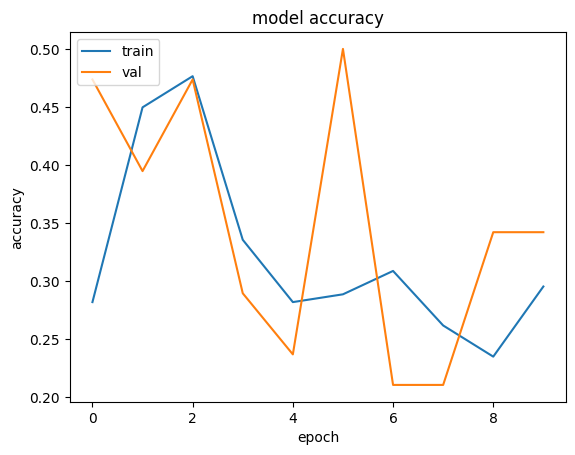

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
loss,accuracy = modelCNN2.evaluate(X_test,Y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.2715 - loss: 1.3863


We got terrible results, concluding that this led to teribble underfitting of data. And we lost a lot of valuable information after dropping 50% of neurons.
But I realised I had run these before normalising our training data.
So after normalisation let's see if it improves..

In [ ]:
import tensorflow as tf
from tensorflow import keras

modelCNN2 = keras.Sequential()

modelCNN2.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(512,512,3)))
modelCNN2.add(keras.layers.MaxPool2D((2,2)))
modelCNN2.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
modelCNN2.add(keras.layers.MaxPool2D((2,2)))
modelCNN2.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
modelCNN2.add(keras.layers.Dropout(0.3))
modelCNN2.add(keras.layers.Flatten())

modelCNN2.add(keras.layers.Dense(64,activation='relu'))
modelCNN2.add(keras.layers.Dropout(0.5))
modelCNN2.add(keras.layers.Dense(4,activation='softmax'))
modelCNN2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = modelCNN2.fit(X_train,Y_train,validation_split=0.2,epochs=10)


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 59s 11s/step - accuracy: 0.2945 - loss: 12.3222 - val_accuracy: 0.5526 - val_loss: 1.3279
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 53s 11s/step - accuracy: 0.6198 - loss: 1.0567 - val_accuracy: 0.8684 - val_loss: 0.3430
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 83s 11s/step - accuracy: 0.7094 - loss: 0.6190 - val_accuracy: 0.9474 - val_loss: 0.2016
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 53s 10s/step - accuracy: 0.8439 - loss: 0.3638 - val_accuracy: 0.8947 - val_loss: 0.2042
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 83s 11s/step - accuracy: 0.8828 - loss: 0.2914 - val_accuracy: 0.9211 - val_loss: 0.2217
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 55s 11s/step - accuracy: 0.9065 - loss: 0.2046 - val_accuracy: 0.9211 - val_loss: 0.2061
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 53s 11s/step - accuracy: 0.9345 - loss: 0.2073 - val_accuracy: 0.9211 - val_loss: 0.1417
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 54s 11s/step - accuracy: 0.9740 - loss: 0.1188 - val_accuracy: 0.9474 - val_loss: 0.0988

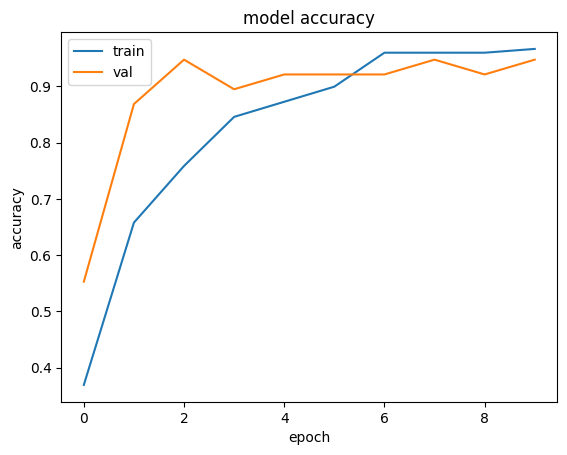

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
loss,accuracy = modelCNN2.evaluate(X_test,Y_test)

#  accuracy: 0.9623 - loss: 0.1550 - val_accuracy: 0.9474 - val_loss: 0.1701
# testing accuracy: 0.9120 - loss: 0.1645

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9120 - loss: 0.1645


In [ ]:
#After normalisation, the accuracy's drastically changed. This depicts the problem of exploding gradients.
#Initially our input values were between 0 and 255, sufficently large. This could lead to large gradient values
#If we have large gradient values, then during updation of parameters, it could keep taking large steps
#And start oscillating. Due to which in the model without normalisation, you can see the drastic ups
#and downs in the graph, as compared to the current one.

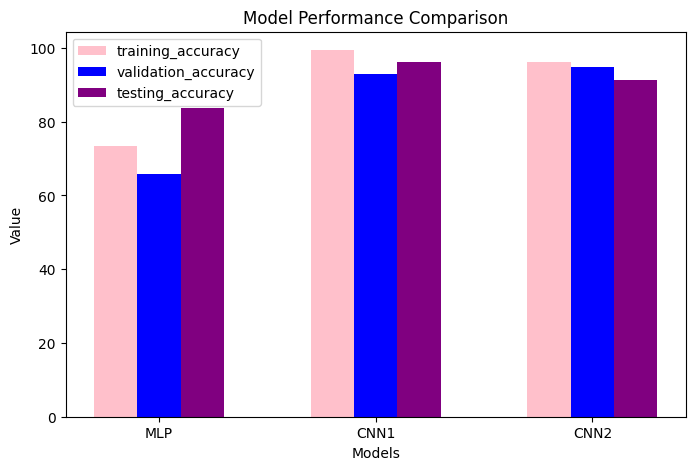

In [ ]:
#Comparison Of All Architectures we used till now..

import matplotlib.pyplot as plt

models = ["MLP","CNN1","CNN2"]
training_accuracy = [73.31, 99.44, 96.23]
validation_accuracy = [65.79, 92.98, 94.74]
testing_accuracy = [83.82,96.12,91.20]


x = np.arange(len(models))

plt.figure(figsize=(8,5))
plt.bar(x-0.2,training_accuracy,0.2,label='training_accuracy',color='pink')
plt.bar(x,validation_accuracy,0.2,label='validation_accuracy',color='blue')
plt.bar(x+0.2,testing_accuracy,0.2,label='testing_accuracy',color='purple')

plt.xticks(x, models)
plt.ylabel("Value")
plt.xlabel("Models")
plt.title("Model Performance Comparison")
plt.legend()
plt.show()

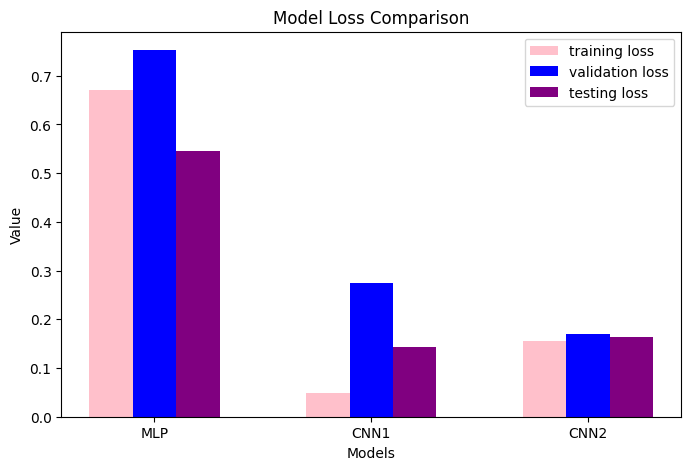

In [ ]:
models = ["MLP","CNN1","CNN2"]
training_loss = [0.67, 0.048, 0.1550]
validation_loss = [0.7528, 0.275, 0.1701]
testing_loss = [0.5454,0.1437,0.1645]


x = np.arange(len(models))

plt.figure(figsize=(8,5))
plt.bar(x-0.2,training_loss,0.2,label='training loss',color='pink')
plt.bar(x,validation_loss,0.2,label='validation loss',color='blue')
plt.bar(x+0.2,testing_loss,0.2,label='testing loss',color='purple')

plt.xticks(x, models)
plt.ylabel("Value")
plt.xlabel("Models")
plt.title("Model Loss Comparison")
plt.legend()
plt.show()

#Conclusions -


Went through multiple approaches to classify flower images, and these are the insights that I observed :

1️) Manual feature extraction with MLP was not enough-


  Initially, I tried extracting color histograms (hue, saturation, brightness) from the images and fed them into a MLP. While this gave some classification ability, it did not perform very well—training accuracy was 73%, and testing accuracy was just 83%. This showed  that manually selecting features wasn't enough for a classification task like this.

2️) Applying CNNs directly on raw images-


  Since CNNs can both extract features and classify them, I switched to using CNNs on raw images instead of relying on histograms. This worked way better, with training accuracy reaching 99%, testing accuracy 96%, and validation accuracy 92%. CNNs were much better at learning important features than manually extracted color histograms.

3️) Overfitting-


Although the CNN performed great on test data, I noticed that training accuracy was too high (99%), meaning that the model couls have memorized the training data rather than learning patterns. To prevent overfitting, I increased dropout in fully connected layers from 40% to 50% and reduced the number of neurons.


5️) Normalizing the data made a drastic difference-


Before normalization, the input images had pixel values ranging from 0 to 255, which caused exploding gradients. gradients became too large, making training unstable and leading to ups and downs in accuracy (you could observe from the graph visualisation) (e.g., testing accuracy dropping from 92% to 68% using the same model but with and without normalisation). After normalizing the images to a 0 to 1 range, the training process  drastically improved. This showed us how important normalization is in stabilizing deep learning models.

